In [1]:
from helper.config import *

In [2]:
import tensorflow as tf

# Libraries to be imported

In [3]:
%matplotlib notebook
import os

import cv2
import numpy as np
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt
import sys

from tqdm import tnrange, tqdm_notebook
from helper.image_manager import ImageManager
from pprint import pprint

# Retreive images from dataset

In [4]:
%%time

image_manager = ImageManager(0, 1)
test_image_manager = ImageManager(7, 8)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



CPU times: user 30.9 ms, sys: 1.56 s, total: 1.59 s
Wall time: 5.77 s


# Visualize one image and its masks

In [5]:
NUM_BYTES_FOR_MASK = image_manager.num_mask

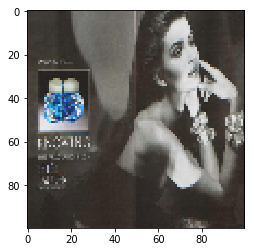

Layer: Text


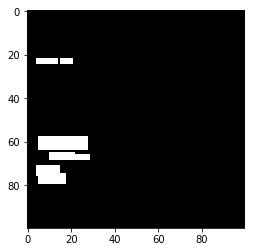

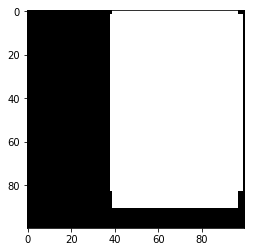

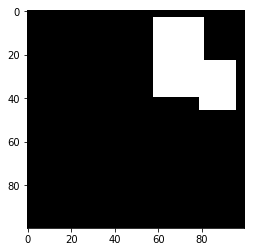

In [6]:
%matplotlib inline
img_mask = image_manager.files[5].reshape([100, 100, NUM_BYTES_FOR_MASK])
folder_path = os.path.join(image_manager.folder_path, '0')
img = cv2.imread(os.path.join(folder_path, os.listdir(folder_path)[5]))
img = cv2.resize(img, (100,100))

plt.figure()
plt.imshow(img)
plt.show()

plt.figure()
print('Layer: Text')
plt.imshow(img_mask[:,:,0], origin="upper", cmap="gray")
plt.show()
        
for i in range(1,NUM_BYTES_FOR_MASK):
    if np.count_nonzero(img_mask[:,:,i])>0:
#         print('Layer:',clustered_classes[i-1])
        fig = plt.figure()
        plt.imshow(img_mask[:,:,i], origin="upper", cmap="gray")
        plt.show()

In [17]:
import helper.vae as vae

In [18]:
tf.reset_default_graph()

In [21]:
import imp
imp.reload(vae)

<module 'helper.vae' from '/gpfs/home/asamanta/Myriad-Ad-Generation/models/research/object_detection/helper/vae.py'>

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Saved model at: /gpfs/scratch/asamanta/models/vae_1024_128_40_sigmoid_adam/model.ckpt
29.9847673659
Original Images vs Reconstructed Images
Layer: 0


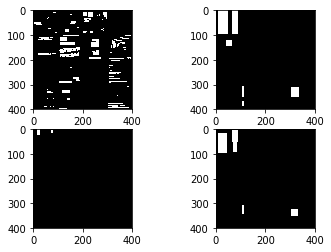

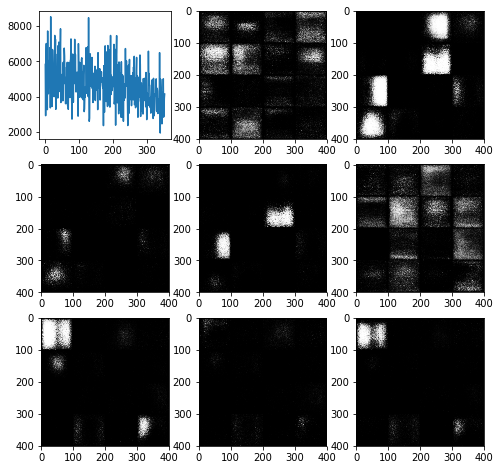

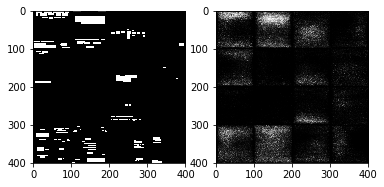

Layer: 1


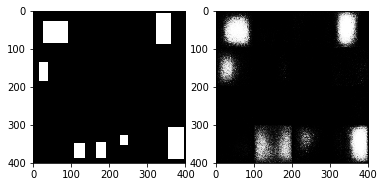

Layer: 2


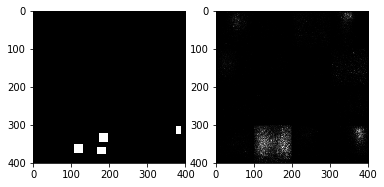

Layer: 3


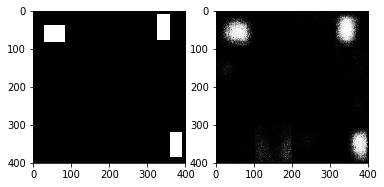

[4221.5498, 3388.3513]


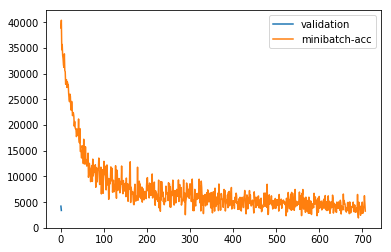

In [16]:
vae.train(image_manager, test_image_manager)

INFO:tensorflow:Restoring parameters from /gpfs/scratch/asamanta/models/vae_1024_128_40_sigmoid_adam/model.ckpt
31.2139183022
Original Images vs Reconstructed Images
Layer: 0


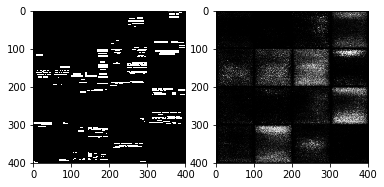

Layer: 1


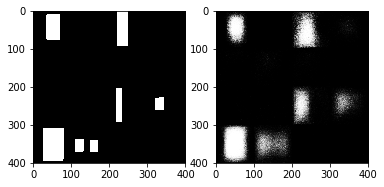

Layer: 2


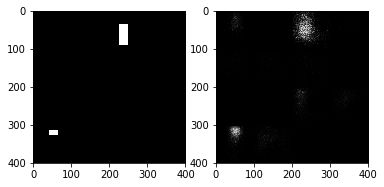

Layer: 3


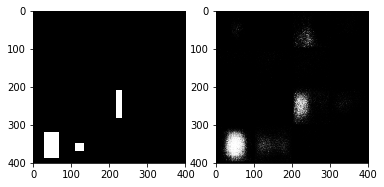

In [23]:
vae.restore_and_test(test_image_manager)

# BETA VARIATIONAL AUTOENCODER

# GENERATING Designs

<IPython.core.display.Javascript object>


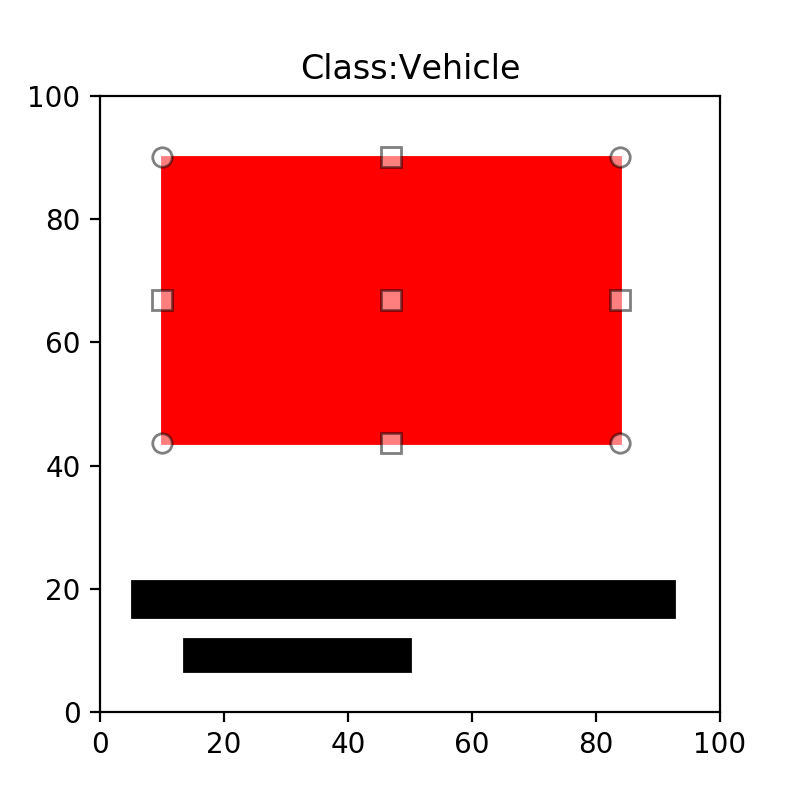

In [66]:
from matplotlib.widgets  import RectangleSelector
rect_colors = {'2':'#00FF00', '3':'#0000ff', '4':'#ff0000', '1': '#000000'}
color_tuples = {'2':[0,255,0], '3':[0,0,255], '4':[255,0,0], '1': [0,0,0]}
layers = {'2':2, '3':1, '4':3, '1':0}
layer_names = {'2':'Human', '3':'Body part', '4':'Vehicle', '1':'Text'}

%matplotlib notebook
xdata = np.linspace(0,100, num=100)
ydata = np.linspace(0,100, num=100)

fig, ax = plt.subplots(figsize=(4,4))
ax.set_ylim(0,100)
ax.set_xlim(0,100)
# line, = ax.plot(xdata, ydata)
event_list = []
key_list = []

def toggle_selector(event):
    print(' Key pressed.')
    if event.key in ['Q', 'q'] and toggle_selector.RS.active:
        print(' RectangleSelector deactivated.')
        toggle_selector.RS.set_active(False)
    if event.key in ['R', 'r']:
        print(' RectangleSelector reset.')
        ax.cla()
        ax.set_ylim(0,100)
        ax.set_xlim(0,100)
    if event.key in rect_colors.keys():
        ax.set_title('Class:'+layer_names[event.key])
        print('Class', event.key)
        key_list.append(event.key)
        

def line_select_callback(eclick, erelease):
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata
    try:
        color = rect_colors[key_list[-1]]
    except:
        color = rect_colors['1']
    rect = plt.Rectangle((min(x1,x2),min(y1,y2)), np.abs(x1-x2), np.abs(y1-y2), color=color)
    event_list.append((key_list[-1], int(min(x1,x2)),int(min(y1,y2)), int(np.abs(x1-x2)), int(np.abs(y1-y2))))
    ax.add_patch(rect)


rs = RectangleSelector(ax, line_select_callback,
                       drawtype='box', useblit=True, button=[1], 
                       minspanx=5, minspany=5, spancoords='pixels', 
                       interactive=True)
plt.connect('key_press_event', toggle_selector)
plt.show()

In [44]:
from ipywidgets import *
from IPython.display import display
from IPython.html import widgets

INFO:tensorflow:Restoring parameters from /gpfs/scratch/asamanta/models/vae_1024_128_40_sigmoid_adam/model.ckpt


<IPython.core.display.Javascript object>


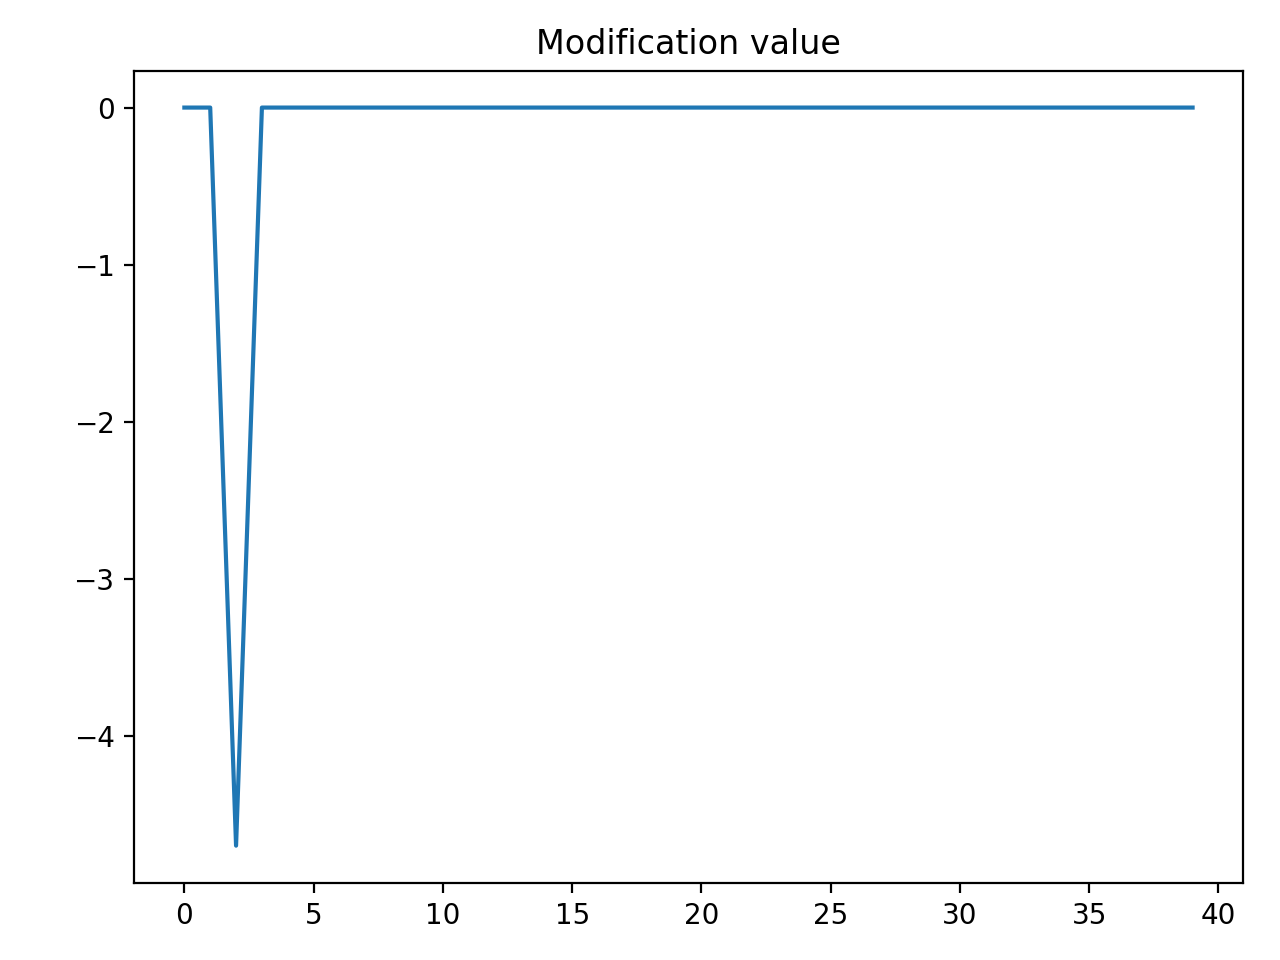

A Jupyter Widget

24.5764114549


A Jupyter Widget

<IPython.core.display.Javascript object>


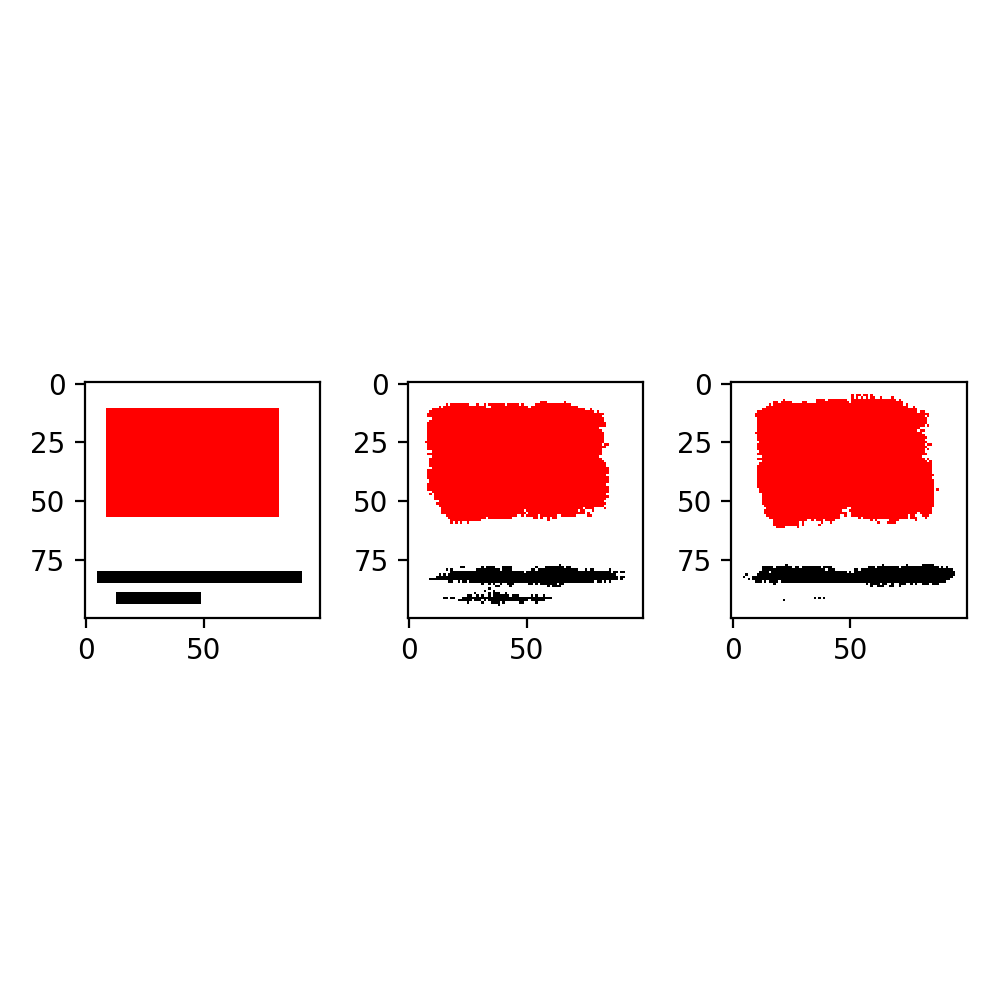

Original Images vs Reconstructed Images


In [67]:

test_image = np.zeros((1,100,100,NUM_BYTES_FOR_MASK), dtype=np.uint8)
for key, x, y, dx, dy in event_list:
    test_image[0, 100-y-dy:100-y, x:x+dx,layers[key]] = 1

img_mask = test_image[0]

# MODEL_PATH = '/gpfs/scratch/asamanta/models/vae_1024_256_64_sigmoid_adam/'
tf.reset_default_graph()
sess = tf.Session()
  # Initialize v1 since the saver will not.
#   v1.initializer.run()
saver = tf.train.import_meta_graph(MODEL_PATH+'/model.ckpt.meta')
saver.restore(sess, tf.train.latest_checkpoint(MODEL_PATH))
dim_ = 100

# Image test set
batch_x = test_image
batch_x = batch_x.reshape(batch_x.shape[0], -1).astype(np.float32)

orig_img = np.ones(shape=(100,100,3), dtype=np.uint8)*255
recons_img = np.ones(shape=(100,100,3), dtype=np.uint8)*255
mod_img = np.ones(shape=(100,100,3), dtype=np.uint8)*255

# Encode and decode the digit image
output = tf.get_default_graph().get_tensor_by_name("decoder:0")
ip_img = tf.get_default_graph().get_tensor_by_name("input:0")
hidden =  tf.get_default_graph().get_tensor_by_name("hidden:0")
encoded_output = hidden.eval(feed_dict={ip_img: batch_x},session=sess)
g = output.eval(feed_dict={hidden: encoded_output},session=sess)

mod_value_list = np.zeros((latent_dim), dtype=np.float32)
fig = plt.figure()

ax = fig.add_subplot(111)
ax.plot(mod_value_list)
ax.set_ylim(-10,10)


mod_dim = 0
def change_dim(input_dim=0):
    global mod_dim
    mod_dim = input_dim

interact(change_dim, input_dim=widgets.IntSlider(min=0,max=latent_dim,step=1,value=0))



canvas_orig = np.round(batch_x).astype(int).reshape([dim_, dim_, NUM_BYTES_FOR_MASK])
canvas_recon = np.round(g).astype(int).reshape([dim_, dim_, NUM_BYTES_FOR_MASK])
canvas_mod = np.round(g).astype(int).reshape([dim_, dim_, NUM_BYTES_FOR_MASK])
print(np.linalg.norm(canvas_orig - canvas_recon))
# fig.show()
def create_new_image(mod_value):
    global mod_dim, mod_value_list
    mod_value_list[mod_dim] = mod_value
    temp_encoded_output = encoded_output.copy()
    temp_encoded_output[0][mod_dim] += mod_value_list[mod_dim]
    ax.clear()
    ax.plot(mod_value_list)
    ax.set_title('Modification value')
    mod_g = output.eval(feed_dict={hidden: temp_encoded_output}, session=sess)
    canvas_mod = np.round(mod_g).astype(int).reshape([dim_, dim_, NUM_BYTES_FOR_MASK])
    mod_img[:,:,:] = 255
    for i in range(NUM_BYTES_FOR_MASK):
        mod_img[(canvas_mod[:,:,i]==1)] = color_tuples[str(i+1)]
        axarr[2].clear()
        axarr[2].imshow(mod_img)
    plt.tight_layout()
    plt.show()
interact(create_new_image, mod_value=widgets.FloatSlider(min=-10.0,max=10.0,step=0.1,value=0.0))

f, axarr = plt.subplots(1,3, figsize=(5,5))
print("Original Images vs Reconstructed Images")  
for i in range(NUM_BYTES_FOR_MASK):
    orig_img[(canvas_orig[:,:,i]==1)] = color_tuples[str(i+1)]
    mod_img[(canvas_recon[:,:,i]==1)] = color_tuples[str(i+1)]
    recons_img[(canvas_mod[:,:,i]==1)] = color_tuples[str(i+1)]
axarr[0].imshow(orig_img)
axarr[1].imshow(recons_img)
axarr[2].imshow(mod_img) 
plt.tight_layout()

In [276]:
sess.close()